In [1]:
import keras
import os
#import cv2 as cv2
from params import get_params
from sklearn import preprocessing
import sklearn.preprocessing
import numpy as np
#from os import walk
#from array import *

import matplotlib.pyplot as plt
#from build_database import build_database

from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

from PIL import Image, ImageOps

import pickle

Using TensorFlow backend.


In [2]:
descriptors_val = pickle.load(open("pickles/save_q_noresdrop_fc2.p", "rb"))

In [3]:
descriptors_train = pickle.load(open("pickles/save_d_noresdrop_fc2.p", "rb"))

In [4]:
imagen = pickle.load(open("save_imgqueries.p", "rb"))

In [5]:
imagen3 = pickle.load(open("save_imgdatabase.p", "rb"))

In [6]:
x_val = np.reshape(descriptors_val, (1673,4096)) 

In [7]:
x_train = np.reshape(descriptors_train, (1671,4096)) 

In [8]:
x_val = sklearn.preprocessing.normalize(x_val, norm='l2', axis=1, copy=True, return_norm=False)

In [9]:
x_train = sklearn.preprocessing.normalize(x_train, norm='l2', axis=1, copy=True, return_norm=False)

In [10]:
descriptors_traint = x_train.transpose()

In [11]:
similarities=np.matmul(x_val,descriptors_traint)

In [12]:
ranks = np.argsort(similarities, axis=1)[:,::-1]

In [13]:
# get the original images for visualization
x_val_images = []
x_train_images = []
x_val_images2 = []
x_train_images2 = []

In [14]:
v = 0
for v in range(1673): 
    x_val_images.append(np.array(imagen[v]))

In [15]:
b = 0
for b in range(1671): 
    x_train_images.append(np.array(imagen3[b]))

In [16]:
h,w = (224, 224)
new_image= Image.new('RGB', (h*11,w*10))

In [17]:
# Visualize ranks of the 10 queries
offset = 0 # it will show results from query #'offset' to #offset+10
for q in range(10):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(11):
      new_image.paste(Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q))

  # visualize query
      ima_q = Image.fromarray(x_val_images[q*(offset+1)])
      ima_q = ImageOps.expand(ima_q, border=20, fill='red')

      new_image.paste(ima_q, (0,w*q))

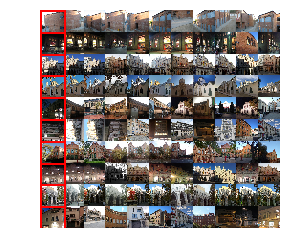

In [18]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

In [24]:
new_image.save('img/test12.png')